In [2]:
##This notebook is dedicated to linear regression analysis

In [6]:
# from google.colab import drive
# drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google'

In [ ]:
# dafsd

In [34]:
import os
os.listdir()

['.ipynb_checkpoints',
 'ChineseFont (1).ttf',
 'ChineseFont.ttf',
 'cost function',
 'gradient descent',
 'newplot.png',
 'Salary_Data (1).csv',
 'Salary_Data.csv',
 'Untitled.ipynb',
 'y w_x + b']

In [14]:
# !pip install wget
# !pip install pandas
# !pip install matplotlib
# !pip install plotly
# !pip install ipywidgets

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 435.7 kB/s eta 0:00:36
   ---------------------------------------- 0.1/15.6 MB 469.7 kB/s eta 0:00:34
   ---------------------------------------- 0.1/15.6 MB 722.1 kB/s eta 0:00:22
   ---------------------------------------- 0.2/15.6 MB 908.0 kB/s eta 0:00:18
    --------------------------------------- 0.3/15.6 MB 1.1 MB/s eta 0:00:14
   - -------------------------------------- 0.5/15.6 MB 1.5 MB/s eta 0:00:11
   - -------------------------------------- 0.5/15.6 MB 1.5 MB/s eta 0:00:11
   -- ------------------------------------- 0.9/15.6 MB 2.3 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/15.6 MB 2.5 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/15.6 MB 2.6 MB/s eta 0:00:06
   --- ------------------------------------ 1.3/15.6 MB 2.6 MB/s eta 0:00:06
   --

In [9]:
# # download the data
# import wget
# # url = "https://drive.google.com/uc?export=download&id=1-6Tdf9uu8nfz6bChSwTvjpse2pifeJ3t"
# #output_path = '/content/drive/MyDrive/Colab_Notebooks/linear_regression/Salary_Data.csv'   # on colab

# url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"   # from ref. 
# output_path = './Salary_Data.csv'
# wget.download(url, out=output_path)

'./Salary_Data.csv'

In [35]:
import pandas as pd

output_path = './Salary_Data.csv'

path = output_path
df = pd.read_csv(output_path)

# y = w*x + b
x = df["YearsExperience"]
y = df["Salary"]
df.head(5)

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2


In [36]:
# # download the chinese font
# url="https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf" 
# # output_path = '/content/drive/MyDrive/Colab_Notebooks/linear_regression/ChineseFont.ttf'
# output_path = './ChineseFont.ttf'
# wget.download(url, out=output_path)

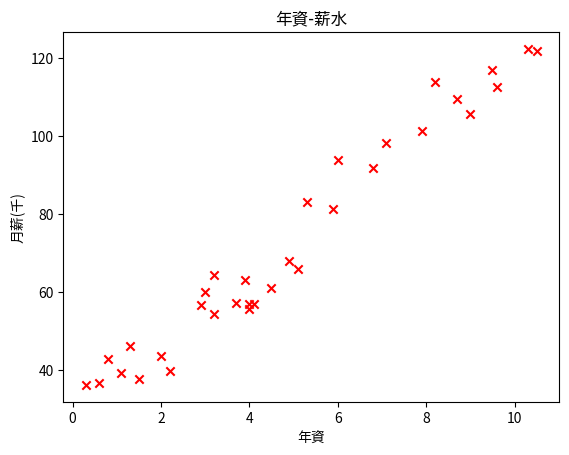

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.scatter(x, y, marker="x", color="red")
plt.title("年資-薪水")
plt.xlabel("年資")
plt.ylabel("月薪(千)")
plt.show()

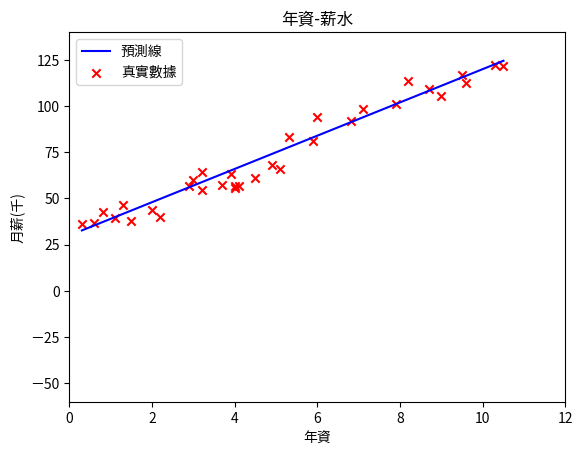

In [38]:
def plot_pred(w, b):
  y_pred = x*w + b
  plt.plot(x, y_pred, color="blue", label="預測線")
  plt.scatter(x, y, marker="x", color="red", label="真實數據")
  plt.title("年資-薪水")
  plt.xlabel("年資")
  plt.ylabel("月薪(千)")
  plt.xlim([0, 12])
  plt.ylim([-60, 140])
  plt.legend()
  plt.show()

plot_pred(9, 30)

In [39]:
from ipywidgets import interact

interact(plot_pred, w=(-100, 100, 1), b=(-100, 100, 1))

interactive(children=(IntSlider(value=0, description='w', min=-100), IntSlider(value=0, description='b', min=-…

<function __main__.plot_pred(w, b)>

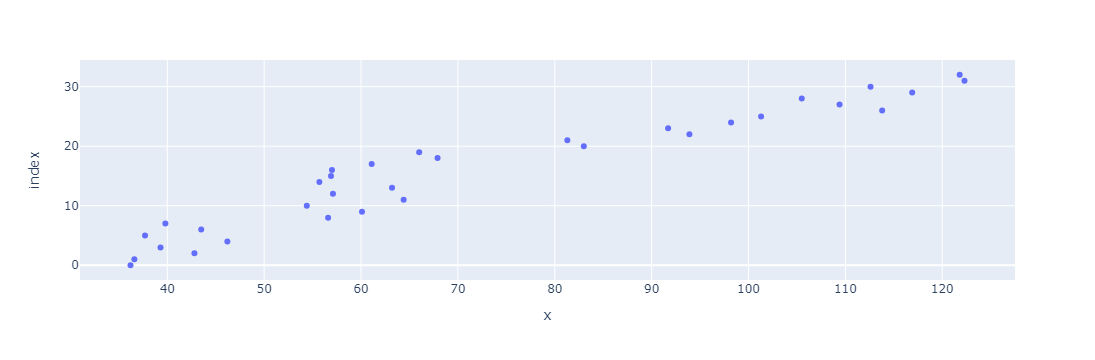

In [40]:
import plotly.express as px
fig = px.scatter(x, y)
fig.show()

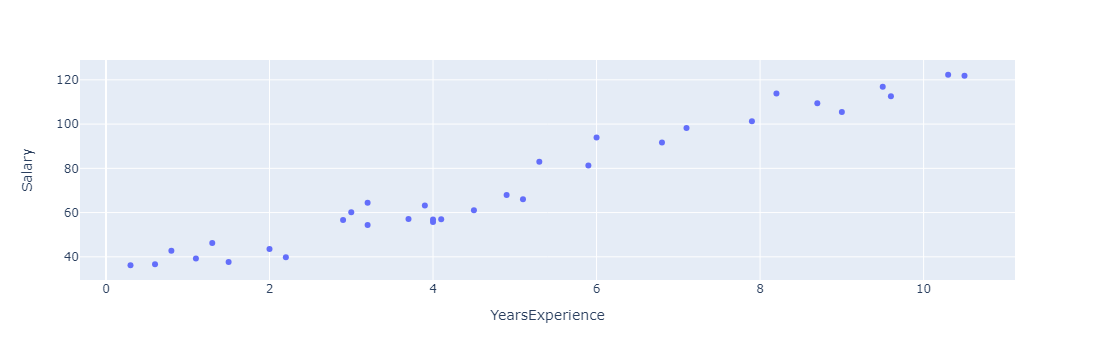

In [41]:
import plotly.express as px
fig = px.scatter(df, x="YearsExperience", y="Salary")
fig.show()

In [42]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive scatter plot with Iris dataset'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by petal width:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=2.5, step=0.1,
        marks={0: '0', 2.5: '2.5'},
        value=[0.5, 2]
    ),
])


@app.callback(
    Output("scatter-plot", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = px.data.iris() # replace with your own data source
    low, high = slider_range
    mask = (df['petal_width'] > low) & (df['petal_width'] < high)
    fig = px.scatter(
        df[mask], x="sepal_width", y="sepal_length", 
        color="species", size='petal_length', 
        hover_data=['petal_width'])
    return fig
